In [ ]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np
from math import sqrt
from numpy import log
from pandas import Series



from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels as sm

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
from datetime import datetime
import subprocess

In [ ]:
df = pd.read_csv('gold_data.csv')

In [ ]:
ds_gold = 'GLD'
ds_etf = 'Close'
date_format = '%d-%m-%Y'
df = df[['date', ds_gold]]
df['date'] = [datetime.strptime(i, date_format) for i in df['date']]
df.set_index('date')
# df.index = pd.to_datetime(df.index, format=date_format)
print(df.columns)
dd =df

Index(['date', 'GLD'], dtype='object')


In [ ]:
df.head()

,date,GLD
0,1968-04-01,38.0
1,1968-04-02,37.6
2,1968-04-03,37.7
3,1968-04-04,36.7
4,1968-04-05,37.2


In [ ]:
df = df.dropna()

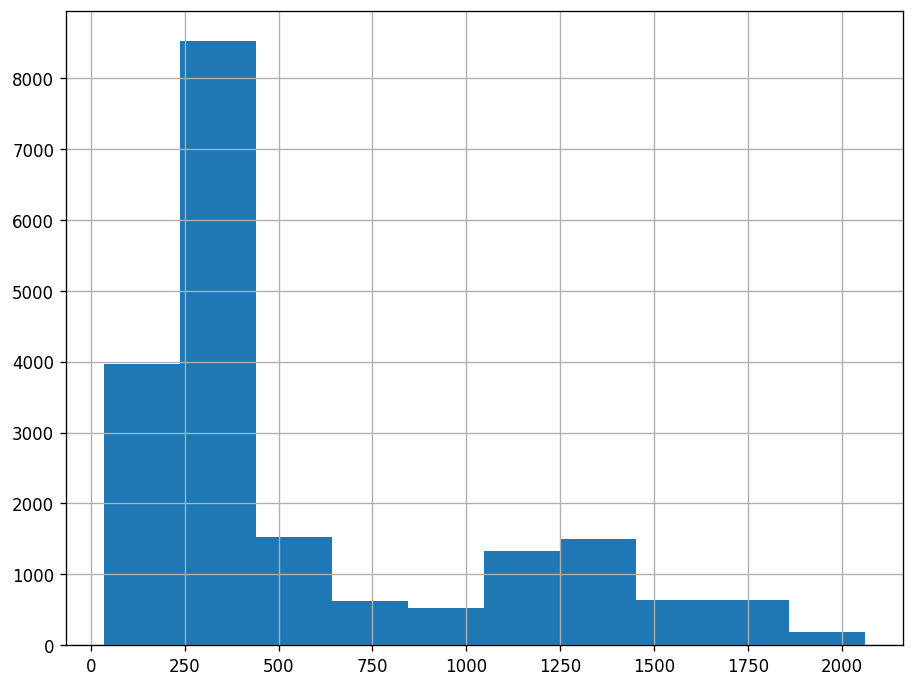

3.5488987378095067 7.631189152146955


In [ ]:
df[ds_gold].hist()
plt.show()
log_transform = log(df[ds_gold])
print(min(log_transform), max(log_transform))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


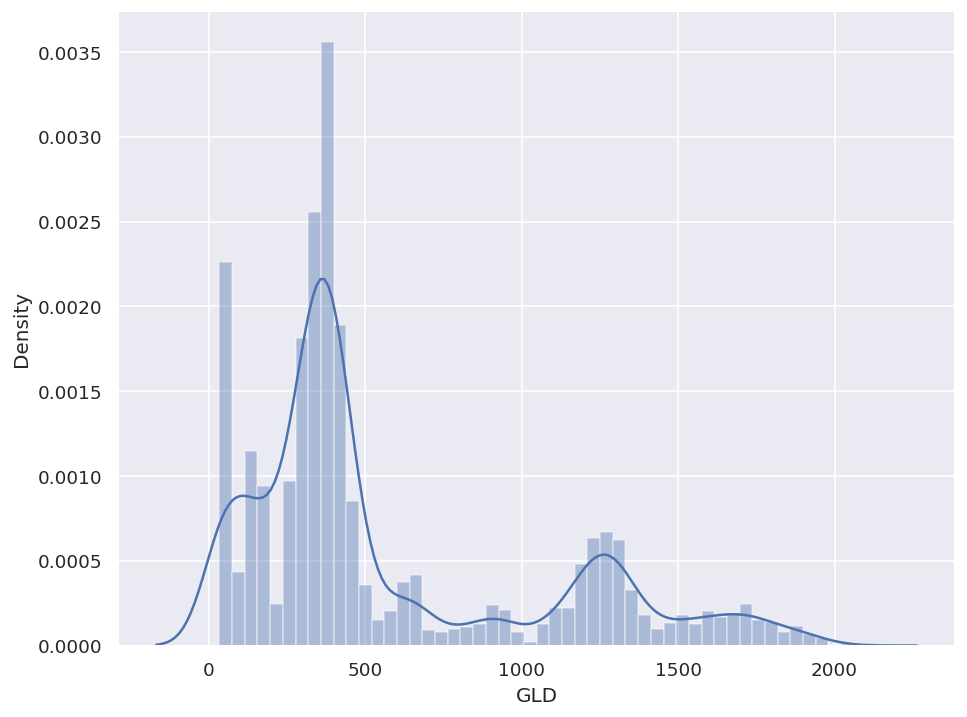

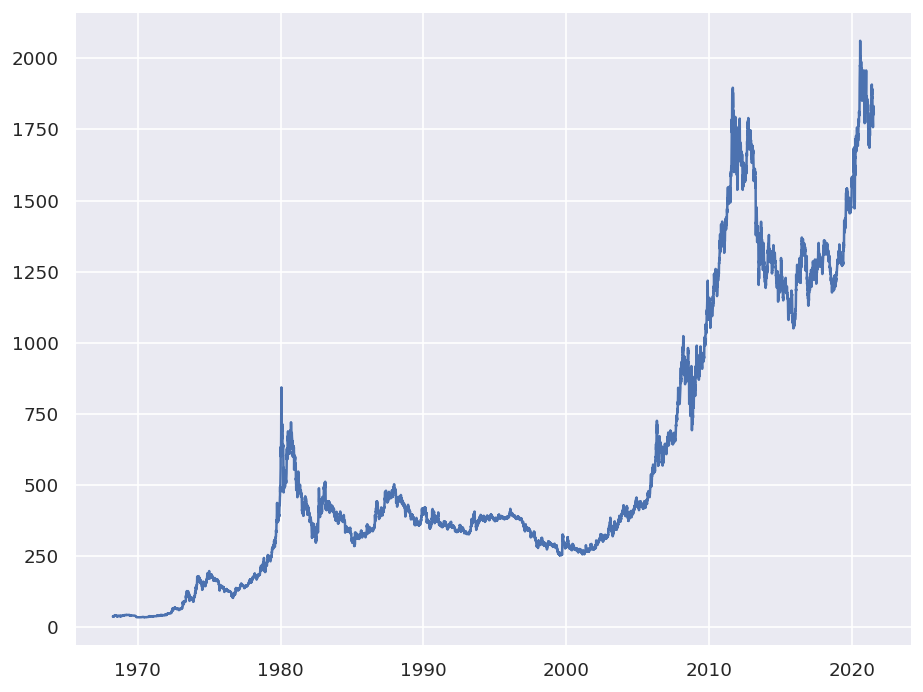

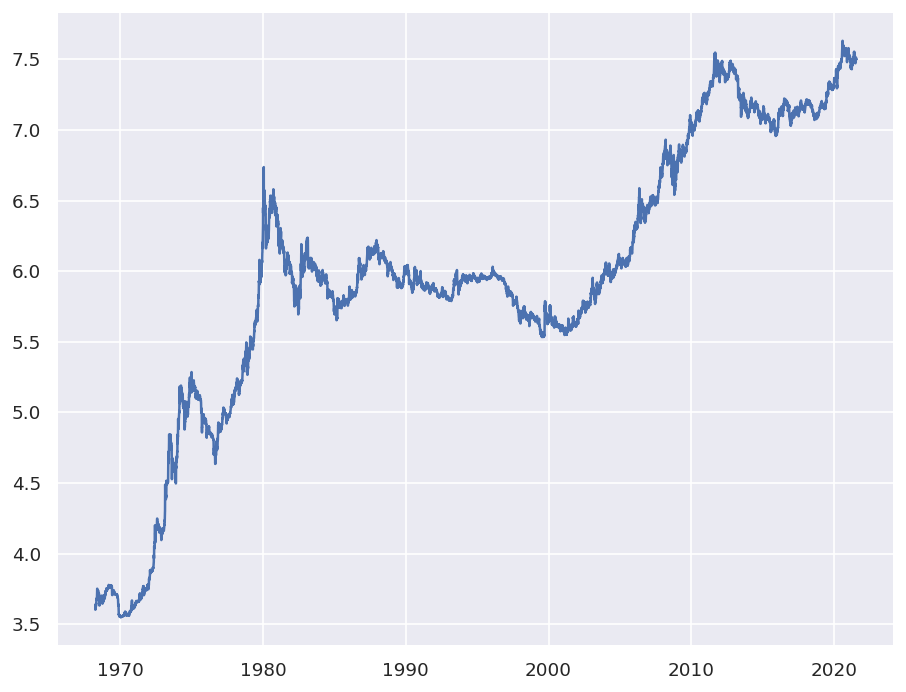

In [ ]:
sns.set()
sns.distplot(df[ds_gold])
plt.show()

plt.plot(df['date'], df[ds_gold])
plt.show()

plt.plot(df['date'], log_transform)
plt.show()


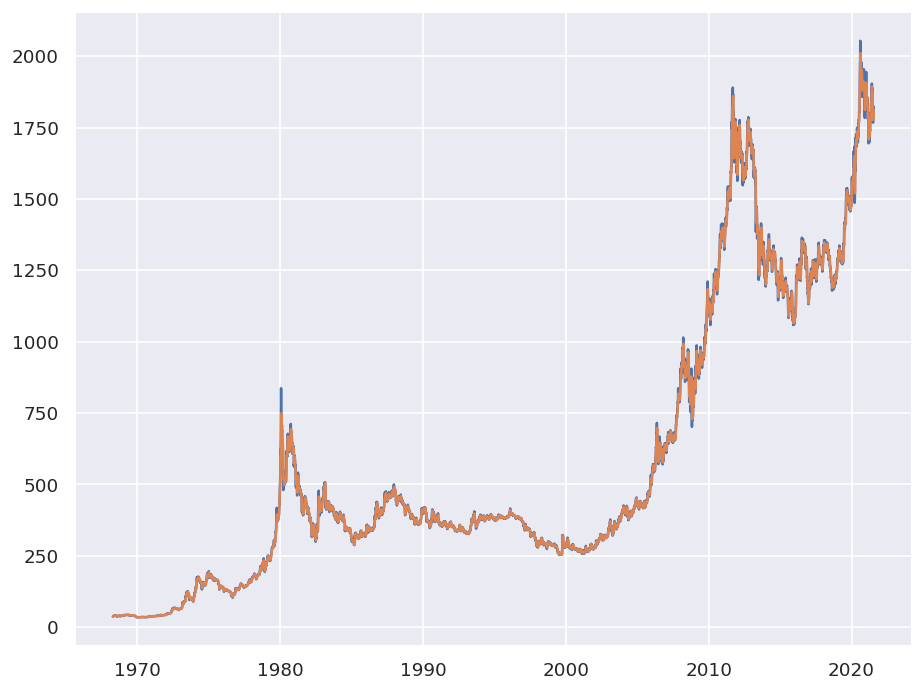

12    38.07
13    38.08
14    38.09
15    38.10
16    38.00
Name: GLD, dtype: float64

In [ ]:
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
plt.plot(df['date'], df['S_1'])
plt.plot(df['date'], df["S_2"])
plt.show()


# dependent variable
y = df[ds_gold]
y.head()

In [ ]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

In [ ]:
X_test.shape

(3892, 2)

Gold Price = 1.14 * 2 Month Moving Average -0.14 * 1 Month Moving Average + -0.01


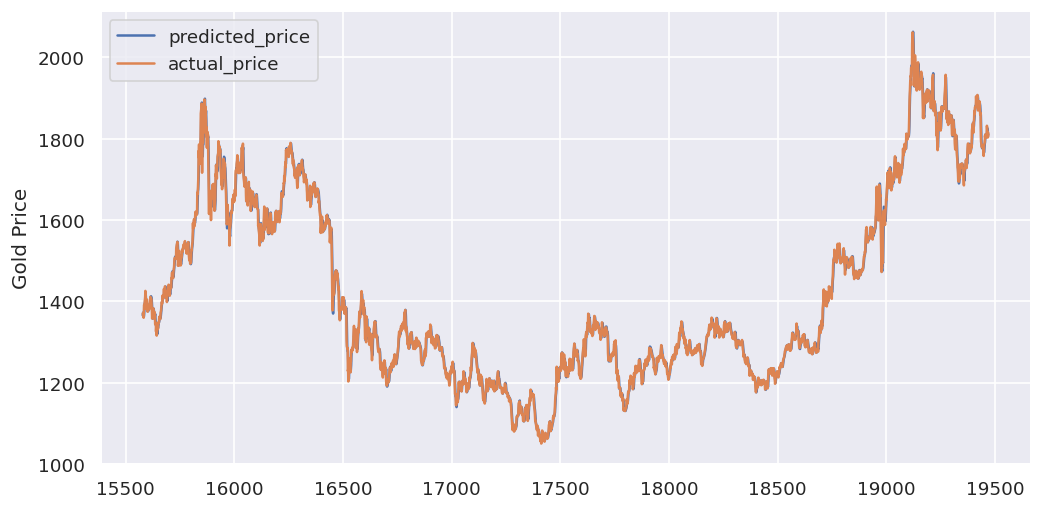

R square for regression 99.61


14.191915827962736

In [ ]:
# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))


In [ ]:
# Check stationarity
X = df[ds_gold]
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

result_of_adfuller = adfuller(df[ds_gold])
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

mean1=277.184346, mean2=870.074537
variance1=25793.553598, variance2=269380.884020
ADF Statistic: 0.464735
p-value: 0.983761
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


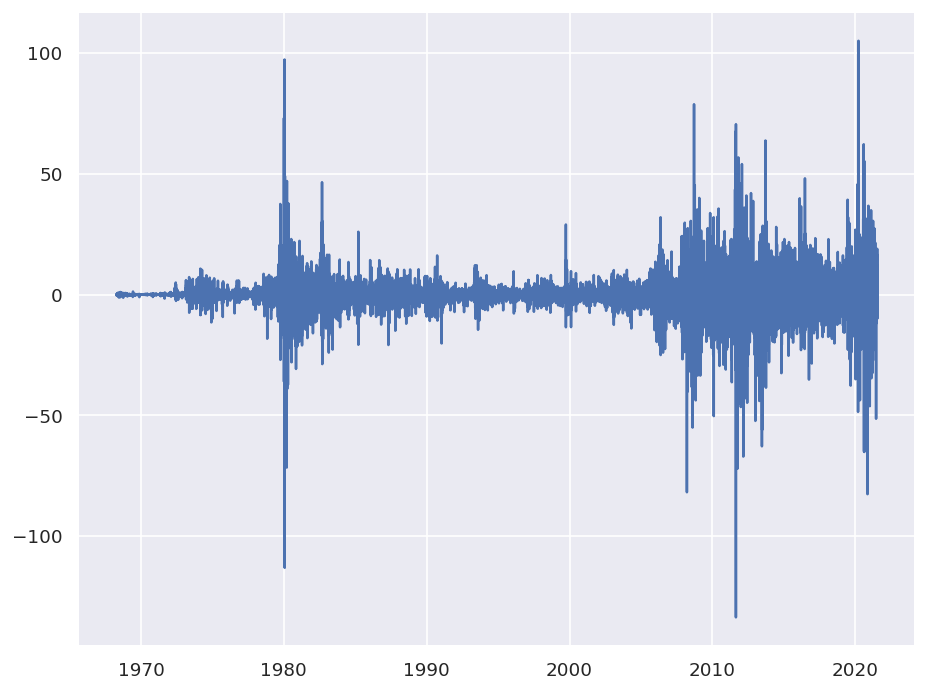

ADF Statistic: -22.370370
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
# To remove trends, differencing of order 1
k = df[ds_gold].diff()
plt.plot(df['date'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

         S_1       S_2
25 -0.016667  0.015000
26  0.150000  0.035000
27  0.055556  0.035556
28  0.094444  0.036111
29  0.016667  0.045833


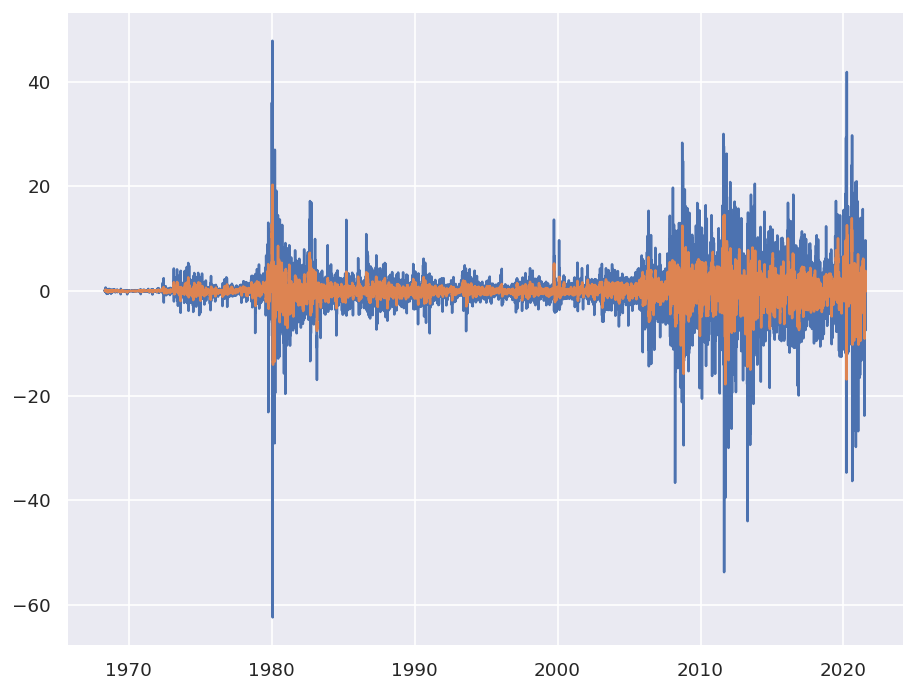

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


25    0.250000
26    0.016667
27    0.016667
28    0.016667
29    0.550000
Name: GLD, dtype: float64

In [ ]:
# Again regression
df[ds_gold] = k
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
print(X.head())
plt.plot(df['date'], df['S_1'])
plt.plot(df['date'], df["S_2"])
plt.show()

df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()

# dependent variable
y = df[ds_gold]
y.head()

Gold Price = 0.1 * 2 Month Moving Average -0.15 * 1 Month Moving Average + 0.09


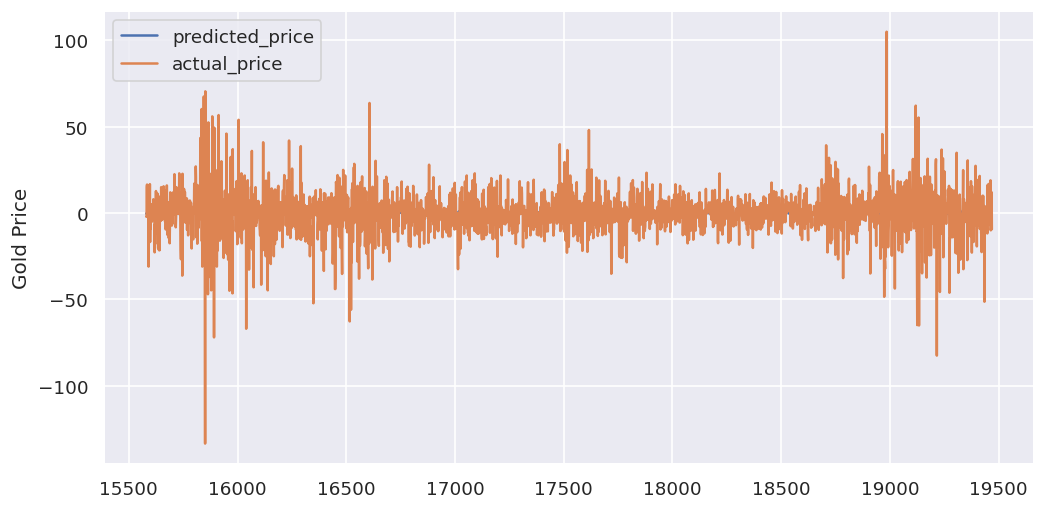

R square for regression 0.44


11.028084439257931

In [ ]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

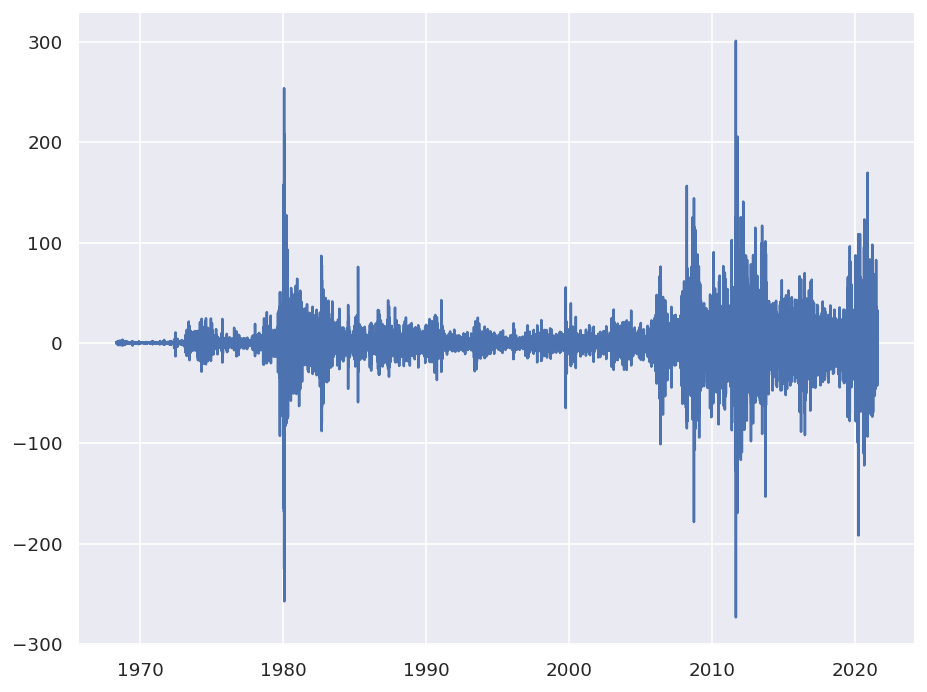

ADF Statistic: -45.833227
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
# Trying 2nd order differencing
k = df[ds_gold].diff().diff()
plt.plot(df['date'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

             S_1       S_2
39  3.333331e-09  0.019444
40  1.111111e-01 -0.008333
41 -2.777778e-01 -0.019444
42 -3.333334e-09 -0.044444
43  3.333334e-02  0.045833


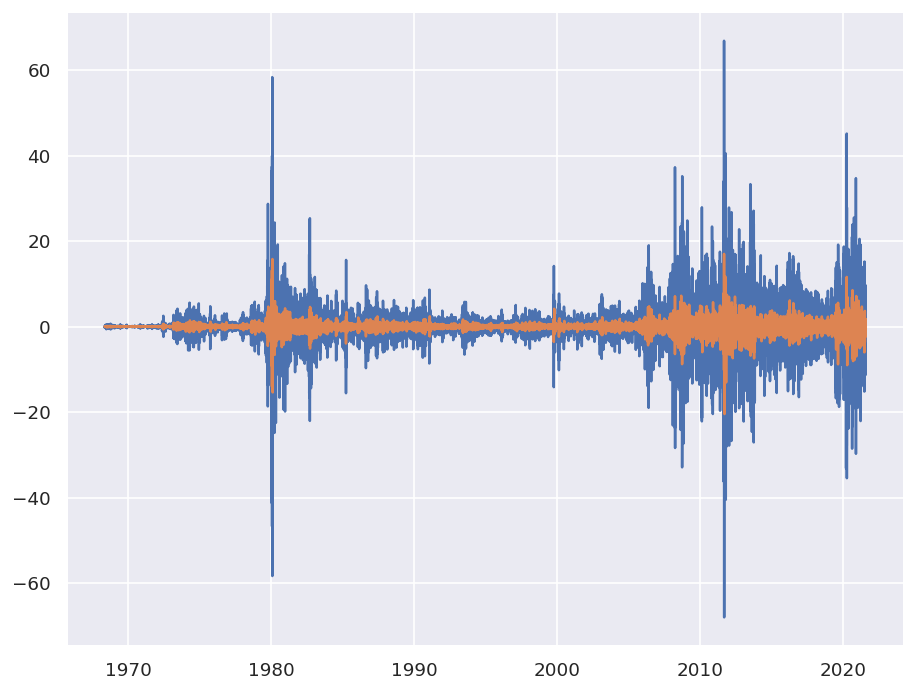

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Gold Price = -1.42 * 2 Month Moving Average -6.5 * 1 Month Moving Average + 0.0


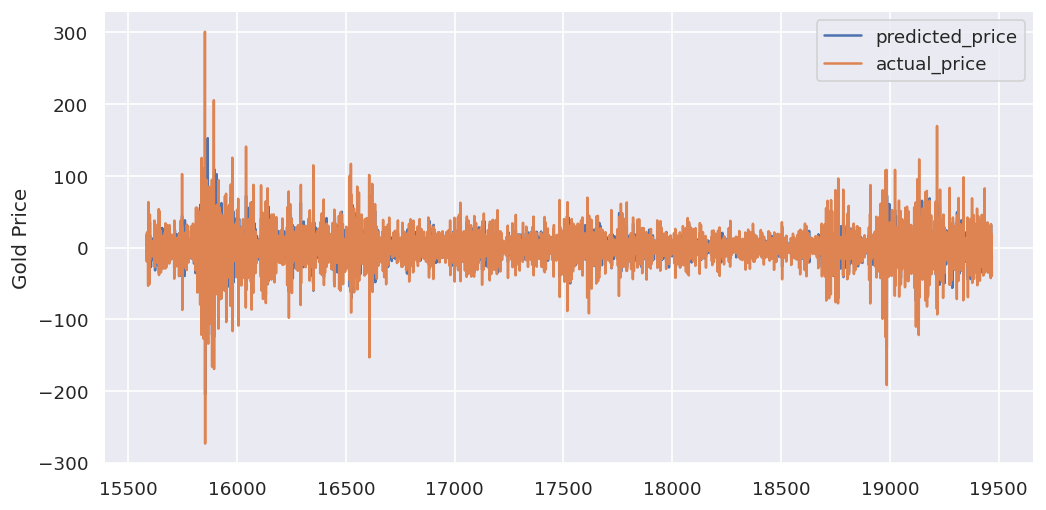

R square for regression 50.38
RMSE:  18.26915232834834


In [ ]:
# Again regression
df[ds_gold] = k
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
print(X.head())
plt.plot(df['date'], df['S_1'])
plt.plot(df['date'], df["S_2"])
plt.show()


# dependent variable
y = df[ds_gold]
y.head()
# print(y.head())
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
print("RMSE: ",sqrt(mean_squared_error(y_test,predicted_price)))

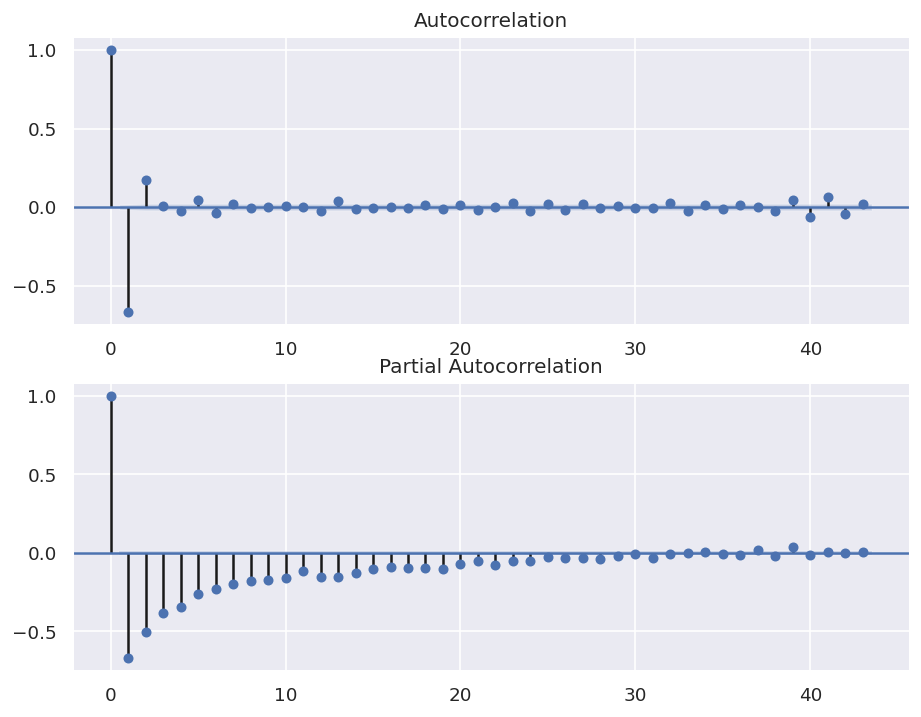

In [ ]:
series = df[ds_gold]
plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [ ]:
del df['S_1']
del df['S_2']

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df[ds_gold].values,order=(2, 1, 2),seasonal_order=(2, 1, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
results.summary()
df['sarimax_predict'] = results.predict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                19431
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood              -71737.850
Date:                            Fri, 10 Sep 2021   AIC                         143493.700
Time:                                    17:37:00   BIC                         143564.553
Sample:                                         0   HQIC                        143516.916
                                          - 19431                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6545      0.007    -95.755      0.000      -0.668      -0.641
ar.L2         -0.1736      0.009    -19.951      0.000      -0.191      -0.157
ma.L1         -1.9993      0.004   -500.845      0.000      -2.007      -1.991
ma.L2          0.9994      0.004    250.249      0.000       0.992       1.007
ar.S.L12      -0.4577      0.187     -2.450      0.014      -0.824      -0.092
ar.S.L24      -0.0572      0.014     -4.170      0.000      -0.084      -0.030
ma.S.L12      -0.5499      0.187     -2.943      0.003      -0.916      -0.184
ma.S.L24      -0.4423      0.186     -2.378      0.017      -0.807      -0.078
sigma2       191.0680      1.612    118.498      0.000     187.908     194.228
===================================================================================
Ljung-Box (Q):                     2134.48   Jarque-Bera (JB):           1040428.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.00   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

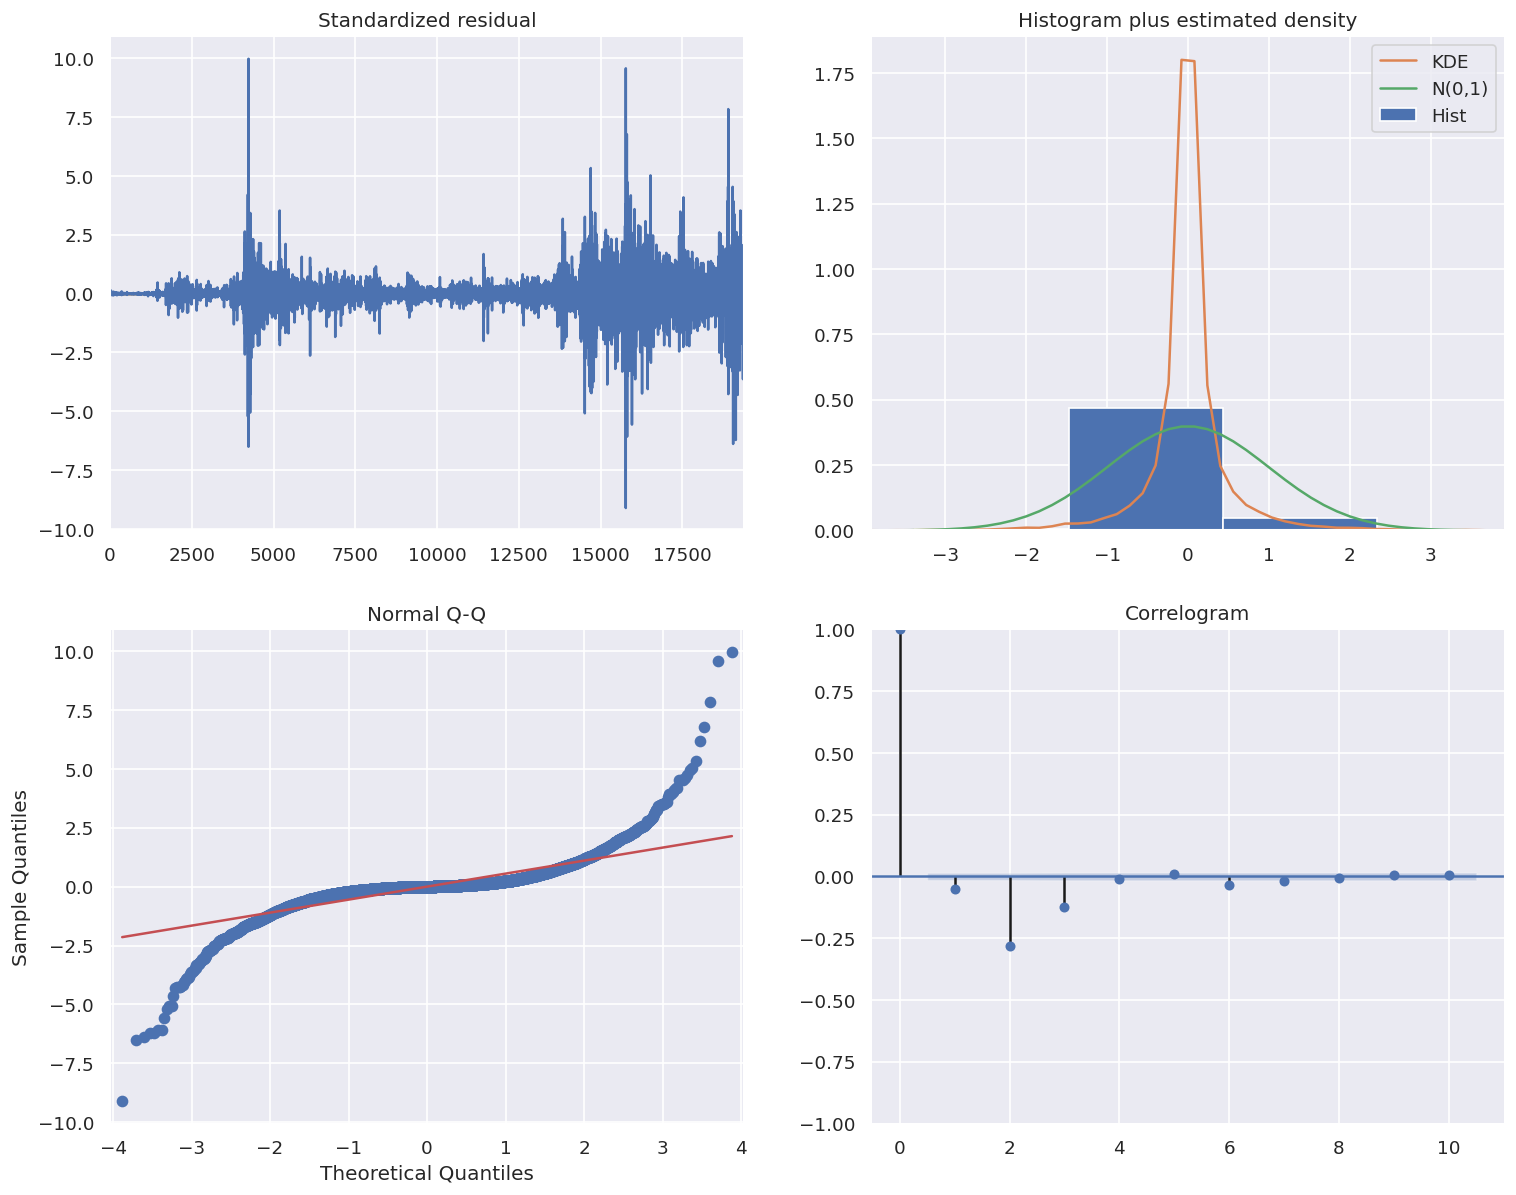

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
print("RMSE: ",sqrt(mean_squared_error(df[ds_gold],df['sarimax_predict'])))
from sklearn.metrics import r2_score
print("R2 SCORE: ",r2_score(df[ds_gold],df['sarimax_predict']))

RMSE:  7.625072176196393
R2 SCORE:  0.7667087848571176


In [ ]:

import datetime as dt

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df['GLD'], order=(1,2,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.GLD   No. Observations:                19429
Model:                 ARIMA(1, 2, 0)   Log Likelihood              -95117.611
Method:                       css-mle   S.D. of innovations             32.352
Date:                Fri, 10 Sep 2021   AIC                         190241.223
Time:                        17:51:23   BIC                         190264.846
Sample:                             2   HQIC                        190248.962
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0013      0.129     -0.010      0.992      -0.254       0.251
ar.L1.D2.GLD    -0.8006      0.004   -186.229      0.000      -0.809      -0.792
                                    Roots   